In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import sklearn.datasets
import sklearn.cluster
import umap
import glob
from PIL import Image

La siguiente celda es necesaria para poder convertir las imágenes a imágenes de menor tamaño (32,32,3). Esto, para poder correr el código más rápido.

In [3]:
loc = ['glacier/*.jpg', 'forest/*.jpg', 'buildings/*.jpg']

for i in range(0,3):
    names = glob.glob(loc[i])
    for element in names:
        image = Image.open(element)
        image.thumbnail((32,32))
        image.save(element)

In [4]:
imagenes = []
labels = []
loc = ['glacier/*.jpg', 'forest/*.jpg', 'buildings/*.jpg']

for i in range(0,3):
    names = glob.glob(loc[i])
    for element in names:
        image_ = np.array(np.float_(im.imread(element)))
        if(np.shape(image_)[0] == 32.):
            imagenes.append(image_)
            labels.append(i)
            
x = np.array(imagenes).reshape((len(imagenes),-1))
labels = labels

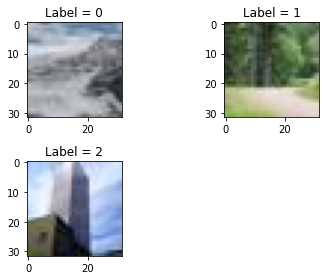

In [5]:
ii = [0,800,999]

for i in range(0,3):
    plt.subplot(2,2,i+1)
    plt.imshow(np.int_(imagenes[ii[i]]))
    plt.title('Label = {}'.format(labels[ii[i]]))
plt.tight_layout()

En este data set, tomado de https://www.kaggle.com/puneet6060/intel-image-classification, 0 se refiere a la foto de un glaciar, 1 del bosque y 2 de un edificio

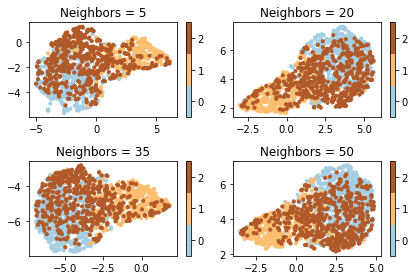

In [10]:
n_neigh = np.linspace(5,50,4)

for i in range(0,4):
    reducer = umap.UMAP(n_neighbors=int(n_neigh[i]))
    reducer.fit(x)
    embedding = reducer.transform(x)
    plt.subplot(2,2,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = labels, cmap='Paired', s=10.0)
    plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
    plt.title('Neighbors = {}'.format(int(n_neigh[i])))
plt.tight_layout()

Acá se están probando diferentes números de vecinos. Pero como se puede ver, los clusters que se encuentran en cada caso sin muy parecidos. Teniendo en cuenta que estos son los números de vecinos locales, tiene sentido que no haya mucha diferencia entre los resultados ya que se está tratando de imágenes de color. Entonces, para poder probar el parámetro de min_dist, en las siguiente celdas se fijará n_neighbors = 20.

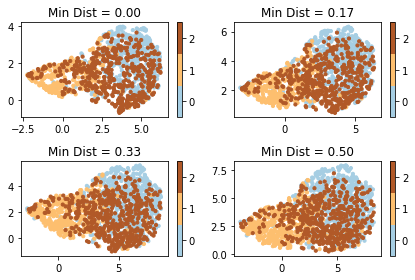

In [17]:
min_dis = np.linspace(0.001,0.5,4)

for i in range(0,4):
    reducer = umap.UMAP(n_neighbors=20, min_dist = min_dis[i])
    reducer.fit(x)
    embedding = reducer.transform(x)
    plt.subplot(2,2,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = labels, cmap='Paired', s=10.0)
    plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
    plt.title('Min Dist = {:.2f}'.format(min_dis[i]))
plt.tight_layout()

Teniendo en cuenta ladistancia, se puede ver que los clusters de 1 y 0 se ven algo más separados cuando min_dist = 0.001. Ahora bien, tal y como en la anterior parte, 2 se encuentra disperso entre los clusters de 1 y 0. Esto se debe a que en las imágenes de edificios se ve presente tanto el color verde como el color azul (el color verde predomina en las figuras del bosque y el color azul en las de glaciares). Entonces, para poder ver el efecto de metrics, se fijara min_dist = 0.001.

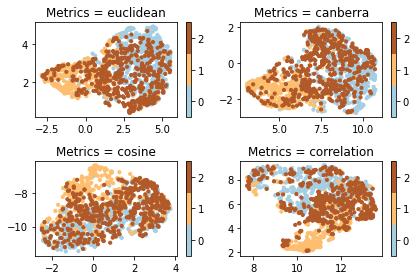

In [21]:
metrics = ['euclidean','canberra','cosine','correlation']

for i in range(0,4):
    reducer = umap.UMAP(n_neighbors=20, min_dist = 0.001, metric = metrics[i])
    reducer.fit(x)
    embedding = reducer.transform(x)
    plt.subplot(2,2,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = labels, cmap='Paired', s=10.0)
    plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
    plt.title('Metrics = {}'.format(metrics[i]))
plt.tight_layout()

Olvidandose un momento de las imágenes de edificios, se ve que 'canberra' logra distinguir de buena manera entre lo que son las imágenes de bosques y las imágenes de glaciares. Entonces, es posible usar esta métrica con el fin de poder obtener un intento de clasificación de las imágenes. En la siguiente celda se lleva a cabo el k-means clustering con los parámetros encontrados.

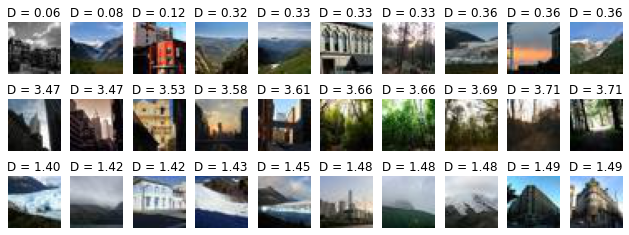

In [24]:
reducer = umap.UMAP(n_neighbors=20, min_dist = 0.001, metric = 'canberra')
reducer.fit(x)
embedding = reducer.transform(x)
cluster = k_means.predict(embedding)
distance = k_means.transform(embedding)
plt.figure(figsize=(11,4))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i])
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(np.int_(imagenes[ind]))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

Como se puede ver, de alguna manera el primer cluster tiene bosques y edificios, el segundo tambien y el tercero tiene glaciares y edificios. Con esto se ve claro que el algoritmo logra diferenciar entre los bosques y los glaciares, pero tiene problemas con los edificios. Nuevamente tal y como para el ejercicio de t-sne, se ve que el color de las imágenes tiene una alta influencia en los resultados de estos algoritmos de clasificación. Ademas, considerando los resultados obtenidos para t-sne, se intentó obtener un data set con colores mucho más puntuales con el fin de obtener una mejor clasificación. Pero, como se puede ver, solo se logran clasificar dos clases debido a la ambiguedad que se encuentra con los edificios. 